# Python script for visualizing SW2D files

In [89]:
#libraries
import numpy as np
import os.path
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14


In [90]:
print(plt.rcParams["font.size"])

14.0


In [91]:
Test = "Kara_gate"
#"KaraGate_tides_test_192h_859x457";

Nx = 715;
Ny = 456;

Bmin = -328.13;

In [153]:
#engine

#Bmin = 0;

def readSW2D(path):
    if (os.path.exists(path + "/Grid/t.dat")):
        grid_path = path + "/Grid/"
        t_list = np.fromfile(grid_path + "t.dat", dtype=float, count=-1, sep=' ');
        B = np.reshape(np.fromfile(grid_path + "B.dat", dtype=float, count=-1, sep=''),(Nx,Ny)) + Bmin;
        
        X = np.reshape(np.fromfile(grid_path + "X.dat", dtype=float, count=-1, sep=''),(Nx,Ny));
        Y = np.reshape(np.fromfile(grid_path + "Y.dat", dtype=float, count=-1, sep=''),(Nx,Ny));
        Lon = np.reshape(np.fromfile(grid_path + "Lon.dat", dtype=float, count=-1, sep=''),(Nx,Ny));
        Lat = np.reshape(np.fromfile(grid_path + "Lat.dat", dtype=float, count=-1, sep=''),(Nx,Ny));
        
        H = [];
        xU = [];
        yU = [];
        t = [];
        for i in np.arange(0,len(t_list)):
            folder = str(t_list[i]);
            if (t_list[i] == 0): 
                folder = "0";
            
            if (os.path.exists(path + "/" + folder)):
                t.append(t_list[i]);
                H.append(np.reshape(np.fromfile(path + "/" + folder + "/H.dat", dtype=float, count=-1, sep=''),(Nx,Ny)) + B);
                xU.append(np.reshape(np.fromfile(path + "/" + folder + "/xU.dat", dtype=float, count=-1, sep=''),(Nx,Ny)));
                yU.append(np.reshape(np.fromfile(path + "/" + folder + "/yU.dat", dtype=float, count=-1, sep=''),(Nx,Ny)));
                #print(folder)
        print(t);
        return X,Y,Lon,Lat,B,t,H,xU,yU;
    else:
        print("Error! There is no path: " + path + "/Grid/t.dat");
        
#==============================================================================================================================
def plotV(fig,ax,Var,ind=0,streamFlag=True,timeStamp=True,colorbarLabel='',varMax=1,varMin=-1,varDelta=0,cmap='viridis'):
    
    if (varDelta == 0):
        varDelta = (varMax-varMin)/20.0;
        
    if (type(Var) is list):
        V = Var[ind];
    else:
        V = Var;
    
    plt.contourf(Lon,Lat,V,np.arange(varMin,varMax + varDelta, varDelta),cmap=cmap) #,np.arange(-1,1.1,0.1)
    #np.arange(-2,2.1,0.1) ,levels=np.arange(-2,2.1,0.1) ,np.arange(0.0,4,0.1)
    plt.colorbar(label=colorbarLabel); #'Deviation of sea surface, m'
    
    plt.xlabel('Широта, $^o$ с.ш.');
    plt.ylabel('Долгота, $^o$ в.д.');
    #plt.xlabel('Longitude,$^o$ E');
    #plt.ylabel('Lattitude,$^o$ N');
    step = 30;
    
    #lon = Lon[1:len(Lon):step,1:len(Lat):step];
    #lat = Lat[1:len(Lon):step,1:len(Lat):step];
    
    
    
    #u = xU[ind][1:len(Lon):step,1:len(Lat):step];
    #v = yU[ind][1:len(Lon):step,1:len(Lat):step];
    #u_magn = np.sqrt(u**2 + v**2);
    #u = u/u_magn;
    #v = v/u_magn;
    #plt.quiver(lon,lat,u,v);
    
    
    if (timeStamp):
        # these are matplotlib.patch.Patch properties
        props = dict(boxstyle='round', facecolor='white', alpha=0.9)

        # place a text box in upper left in axes coords
        plt.text(0.5, 0.1, 'Время: ' + str(int(t[ind]/3600)) + " ч", transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props);
    
    
    if (streamFlag):
        lon = Lon[:,0];
        lat = Lat[0,:];
        plt.streamplot(lon,lat,np.transpose(xU[ind]),np.transpose(yU[ind]), density=0.8, color='black', 
                      linewidth=1.4,arrowstyle='-|>') #density= [0.5, 1],

    plt.xlim([np.min(Lon), np.max(Lon)]);
    plt.ylim([np.min(Lat), np.max(Lat)]);
    plt.xticks(np.arange(52, 70, 2));
    #plt.show();
    
def save(name='', fmt='png'):
    pwd = os.getcwd()
    iPath = './{}'.format(fmt)
    #if not os.path.exists(iPath):
    #    os.mkdir(iPath)
    #os.chdir(iPath)
    if (fmt=='eps'):
        plt.savefig('{}.{}'.format(name, fmt), fmt='eps',figsize=(600,800),transparent=True,bbox_inches='tight')
    else:
        plt.savefig('{}.{}'.format(name, fmt), fmt=fmt,dpi=300,bbox_inches='tight') #figsize=(600,800) #,transparent=True
    os.chdir(pwd)
    #plt.close()


X,Y,Lon,Lat,B,t,H,xU,yU = readSW2D(Test);

[0.0, 10800.956355, 21600.277193, 32401.233549, 43200.554387, 54001.510742, 64800.831581, 75600.152419, 86401.108774, 97200.429612, 108001.385968, 118800.706806, 129600.027644, 140400.983999, 151200.304837, 162001.261193, 172800.582031, 183601.538386, 194400.859224, 205200.180062, 216001.136418, 226800.457256, 237601.413611, 248400.73445, 259200.055288]


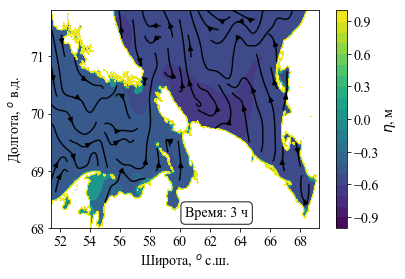

In [154]:
it = 0
fig, ax = plt.subplots();
plotV(fig,ax,H,ind=it,colorbarLabel='$\eta$, м',timeStamp=True)
#save('test' + str(it))
plt.clf()
plt.cla()
it = 1
plotV(fig,ax,H,ind=it,colorbarLabel='$\eta$, м',timeStamp=True)
#save('test' + str(it))

Figure(432x288)


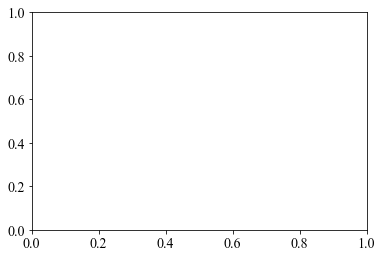

In [94]:
fig, ax = plt.subplots();
print(fig)

In [100]:
print(np.max(H[0][:]))

1233.94


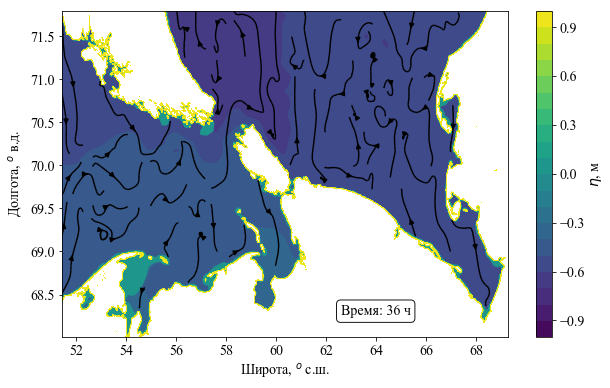

In [155]:
fig, ax = plt.subplots(figsize=(10,6));
for i in np.arange(0,13,4): #len(t)
    plt.clf()
    plt.cla()
    plotV(fig,ax,H,ind=i,colorbarLabel='$\eta$, м',timeStamp=True)
    save('res_t' + str(int(t[i]/3600)),fmt='eps');
    

In [301]:
print(np.max(np.abs(xU[1])))

0.23355298313014125


In [223]:
print(np.max(yU[1][:,-1]))
print(np.max(yU[1][0,:]))

0.04205729063030102
0.6443117864779571


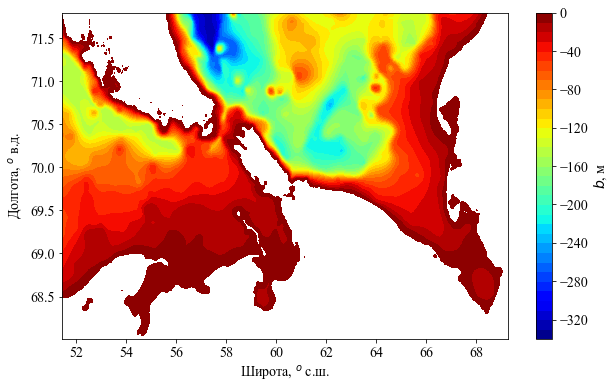

In [150]:
fig, ax = plt.subplots(figsize=(10,6));

plotV(fig,ax,B,colorbarLabel='$b$, м',timeStamp=False,varMax=0.0,varMin=-340.0,varDelta=10.0,streamFlag=False,cmap='jet')
save('b_2d',fmt='eps');